# **A Comparison of Naïve Bayes Classifiers to Predict Likelihoods of Lego Set Attributes**

## Andrew Cai (cai.and@northeastern.edu)

## **Introduction**

This project will focus on the CS5002: Discrete Structures module: Conditional Probability; specifically Bayes Theorem. This theorem is prevalent in machine learning because by definition it is a method to calculate conditional probabilities or in other words the likelihood of something occurring if another event has previously occurred. Therefore, more accurate predictions theoretically can be made by inputting more data into the machine learning model.
<br>
<br>
I have always steered away from coding and data processing because I thought I was not cut out for it. However, research in my previous university and opportunities at work to learn Python and data processing skills made me want to switch careers. I have worked on several data projects at my work such as building Power BI dashboards on quality/manufacturing visualizations. I have also been given the opportunities to assist with automation processing to tell our pieces of equipment how to run things based on previous runs as well creating predictions of when a piece of equipment will go down.
<br>
<br>
As interesting as this was, I really wanted to work on a project revolving in a domain that hit home for me. Growing up, Legos were luxuries that my brother and I looked forward to every few Christmases. They were the inspiration that got me into engineering initially. To this day, my apartment is filled with many Legos sets from the botanical collection.
<br>
<br>
Another reason for this project is that machine learning and AI has been a topic of relevancy as of late which got me also interested in possibly doing a project in it, but I initially thought that it might be too difficult to implement. With the guidance and direction of Professor Veliz, it turned out that this can be possible.
<br>
<br>
This project will cover Naïve Bayes models, but Naïve Bayes belongs to a group called classification algorithms in machine learning. Classification algorithms enable users to predict the likelihood of new data falling into some sort of predetermined category. Other popular classification algorithms are Logistic Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machines.
<br>
<br>
With all the above from my career switch, passion for data science, interest in Legos, and machine learning, this project idea became an amazing opportunity for me. Even though I am not building extremely complex models; this will help me start somewhere on my path to learn a bit about machine learning.
<br>
<br>
After having some experience in industry, I gained some business acumen on what type of data-driven insights companies would like. For example, consumers are sensitive to ratings whether they are justified or not. Regardless of the reasons for the rating, businesses still need to make profit. Things such as a certain theme that does not rate well might not be worth manufacturing anymore compared to highly rated sets. The skills and knowledge I will apply here in this project will be a great introduction.
<br>
<br>
This project attempts to see if there a Naïve Bayes Classification Algorithm that can give us a Good Model to determine the likelihood of a Lego Set getting a “Great” rating based on predictors such as Theme, Number of Minifigures, Packaging Type, etc.
<br>
<br>
Important Project Definitions:
<br>
**Good Model**: Defined as having Accuracy, Precision, and Recall performance scores equal to 85% or higher.
<br>
<br>
**Accuracy**: How many of the actual negatives and positives were correctly labeled by the predicted positives and negatives and can be given by Accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)
<br>
<br>
**Precision**: Of the predicted positives, how many of the values are actually positive and can be given by Precision = True Positive / (True Positive + False Positive)
<br>
<br>
**Recall**: Of the actual positives, how many did the model actually label positive and can be given by Recall = True Positive / (True Positive + False Negative)
<br>
<br>
**Great Rating**: A Lego set with a rating of 4 or higher.

## **Algorithm Set-Up** 

### **Python Packages to Import**

Many of these imports were added as the project progressed and developed: 
<br>
- Pandas-A great package to use when dealing with structured datasets, such as tables saved as .csv, that can easily clean, extract, and manipulate tabular data.
<br>
- NumPy-Data manipulation package that works very well with pandas and can help users create NaN values.
<br>
- Matplotlib-A plotting library that enables the creation of certain plots that works well with NumPy.
<br>
- Decimal-Solely used in one section for ease of formatting decimal outputs.
<br>
- Scikit-learn-The main package this whole project is focused one where it helps provides the supervised machine learning algorithms (Naïve Bayes and K-Nearest Neighbors) along with its helper methods and functions to prepare your data to be used for the algorithms. Furthermore, this package provides means to output the performance of the models.


In [1]:
import pandas as pd # Pandas Documentation — Pandas 2.1.3 Documentation. pandas.pydata.org/docs.
import numpy as np # NumPy Documentation. numpy.org/doc.
import matplotlib.pyplot as plt # Matplotlib Documentation — Matplotlib 3.8.2 Documentation. matplotlib.org/stable/index.html.
from decimal import Decimal # “Decimal — Decimal Fixed Point and Floating Point Arithmetic.” Python Documentation, docs.python.org/3/library/decimal.html.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB # “1.9. Naive Bayes.” Scikit-learn, scikit-learn.org/stable/modules/naive_bayes.html.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # “Sklearn.Metrics.Confusion_Matrix.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.
from sklearn.metrics import classification_report # “Sklearn.Metrics.Classification_Report.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.
from sklearn.model_selection import train_test_split # “Sklearn.Model_Selection.Train_Test_Split.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
from sklearn.preprocessing import LabelEncoder # “Sklearn.Preprocessing.LabelEncoder.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
from sklearn.preprocessing import StandardScaler # “Sklearn.Preprocessing.StandardScaler.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.
from sklearn.neighbors import KNeighborsClassifier # “Sklearn.Neighbors.KNeighborsClassifier.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

### **Data Loading, Cleaning, and Preparation**

For starters, I knew immediately what type of data set I would like to implement which was prices and sales data of Lego sets. I then searched for sites that provided decent open-source datasets. After confirming with some of my peers, Kaggle was an accessible and easy to navigate site that provided tons of datasets. The one I chose for this project was “LEGO Sets and Prices Over Time” by Alex Racape. This dataset met my basic criteria of having the attributes I needed (prices, description, category, sales, etc.), well-formatted as a CSV, and updated within the last month or so (it contained sets like the Wildflower Bouquet released earlier this year).
<br>
<br>
Taking a quick look at the data, there were several attributes (columns) that I did not necessarily need nor were they helpful in the implementation of the algorithms such as the specific name or id of the set. Furthermore, total quantity and availability data was mostly blank and seemed to have underreporting as noted by the author. 
<br>
<br>
Further in my initial analysis, I saw a lot of 0.0 ratings for Lego Sets which would’ve thrown off the algorithms such as the set Lotus Flowers had 0 and yet searching for this set there were ratings currently above a 4.0. This makes sense since this set was released relatively recently and not many users had provided ratings or it’s not as popular and not many users have given ratings. Regardless, it seems a lot of the 0.0 ratings in the data are not necessarily true. Therefore, I decided to replace them with NaN. I then finally dropped all the rows that did not have a value in the attributes we specified above, so we data for the algorithm to better assess the data.
<br> 
<br>
After this initial round of data cleaning, I have the attributes I needed:
- Theme: This where information like Star Wars, Marvel, or Avatar is housed
- Theme_Group: The genre of the Lego set like action
- Category: Normal Lego set or an extended product
- Packaging: The packaging type like a box or in a bin
- Pieces: The number of pieces in the Lego set
- Minifigures: The number of “characters” in the Lego set
- Owned: How many of the respective Lego set is reportedly owned
- Rating: A scale between 0-5 (inclusive right)
- USD_MSRP: The suggested retail price by manufacturer in USD
- Current_Price: How much it’s being sold for currently on average in USD

In [2]:
df = pd.read_csv('Lego_DataSet.csv') # Load in Lego set data as a pandas dataframe
df.drop(['Set_ID', 'Name', 'Year', 'Subtheme', 'Num_Instructions', 'Availability', 'Total_Quantity'], axis=1, inplace=True) # Drop unnecessary columns
df['Rating'].replace(0.0, np.NAN, inplace=True) # Cleaned the ratings column so values that displayed 0 were replaced with NaN
df = df.dropna() # With all the attributes (columns) we want, drop any row that does not have any values

Another check I made was to see what the data types were in each of the attributes to ensure ease of processing. From below, I see that the text-like attributes in the data sets were unspecified objects that would most likely encounter issues later. It made sense to convert these attributes to Python string-types. 

In [3]:
print(df.dtypes) # Check data types

Theme             object
Theme_Group       object
Category          object
Packaging         object
Pieces           float64
Minifigures      float64
Owned            float64
Rating           float64
USD_MSRP         float64
Current_Price    float64
dtype: object


In [4]:
# Convert all object-types into string-types
df['Theme'] = df['Theme'].astype('string')
df['Theme_Group'] = df['Theme_Group'].astype('string')
df['Category'] = df['Category'].astype('string')
df['Packaging'] = df['Packaging'].astype('string')

Taking a first-pass at a correlation assessment, I used Spearman’s method to see if there is any correlation between the numeric attributes in the data. I specifically used Spearman’s method to see if there is a monotonous relationship (one variable increases, the other variable increases or variable increases, the other variable decreases) [1]. The correlation method defaulted in the correlation method within pandas is Pearson’s which look for linearity correlations. It is risky to assume that the relationships between variables are linear, so instead we can look for a monotonous relationship (this does not necessarily exclude the possibility of a linear correlation).
<br>
<br>
Taking a look at the attribute of interest in this project which was the rating, we can see that the relationships have a relatively low positive correlation with each other. So it seems to be key that the additional text-like attributes such as the Theme need to help support the models I am creating.

In [5]:
df2 = df[['Pieces', 'Minifigures', 'Owned', 'Rating', 'USD_MSRP', 'Current_Price']] # Creating a dataframe subset with the numeric attributes only
corrM = df2.corr(method="spearman") # Store the correlation matrix
display(corrM)

,Pieces,Minifigures,Owned,Rating,USD_MSRP,Current_Price
Pieces,1.000000,0.665413,0.050119,0.635789,0.948796,0.781180
Minifigures,0.665413,1.000000,0.097616,0.449410,0.694096,0.616750
Owned,0.050119,0.097616,1.000000,0.203726,0.022075,0.181841
Rating,0.635789,0.449410,0.203726,1.000000,0.603121,0.637564
USD_MSRP,0.948796,0.694096,0.022075,0.603121,1.000000,0.783159
Current_Price,0.781180,0.616750,0.181841,0.637564,0.783159,1.000000


To prepare the data for input in the models, we first must understand how Naïve Bayes works. These methods are a set of supervised learning algorithms revolved around Bayes’ Theorem: 
$$ 
P(A | B) = \frac{P(B | A) \times P(A)}{P(B)}
$$ 
with the “naive” assumption of conditional independence between every pair of features given the value of the class variable [2]. In other words, conditional independence means that P(A | B,C) = P(A | C) and in our case our class variable (the attribute we are interested in) is the Rating (A) with our features(B, C…) is everything else which are the Theme, Theme Group, Category, Packaging, Number of Pieces, Number of Minifigures, Number Owned, Manufacturer Suggested Price, and Current Price.
<br>
<br>
Inside the Naïve Bayes module, this project seeks to use Gaussian, Multinomial, Complement, Categorical and Bernoulli. The Gaussian input can take continuous features, multinomial/complement takes discrete features, categorical takes features that are categorized, and finally Bernoulli can only take features that are Boolean in nature [2].
<br>
<br>
Off the bat, I decided to not implement Bernoulli Naïve Bayes because our features/attributes cannot easily be distinguished as 0s or 1s. For example, the Theme attribute, it does not make any sense to create a columns of 0s and 1s to do Star Wars vs not Star Wars or any specific theme in general. We would then have to do it for the Theme Group, Category, Packaging, etc. which ends up hiding a lot of key feature value granularity. The only way to realistically to implement Bernoulli is if we took every Theme and turned them into a column themselves and we end up with hundreds of columns plus more since we would have to do the same for the other non-boolean columns. The dataset that is imported is not set up for this and this is beyond the initial project scope. Instead we will later on compare another classification algorithm entirely.  
<br>
Based on the information above, we will now have to prepare our data to be usable as inputs. We will categorize our Rating data into two classes which are Great (scoring a four or higher) and Not Great (scoring lower than a four). This was specified during the project scope.
<br>
<br>
We will need to specify and map encode values in the data set. None of the Naïve Bayes models can take text values, so we will have to map values to an integer. So Star Wars, for example, will be mapped to 57. We must do the same for the Theme Group, Category, and Packaging. Then, due to the nature of Naïve Bayes models outside of Gaussian Naïve Bayes, we do not want continuous values. So, for example, I do not want my models to think that $101 is necessary different from $102. We have too much granularity here. I will need to then categorize them as “Between $100 - $200.” The range labeling is subjective and the designated categories for the Number of Pieces, Number Owned, Manufacturer Suggested Retail Price, Current Price, and Number of Minifigures are based on domain knowledge and sifting through the dataset of reasonable value ranges.
<br>
<br>
After we create categories for our continuous variables, we can assign them encoded mappings like we did for the text-based values.


In [6]:
le = LabelEncoder() # Store encoder

df['Theme Encoded'] = le.fit_transform(df['Theme']) # Encode the Theme
df['Theme_Group Encoded'] = le.fit_transform(df['Theme_Group']) # Encode the Theme Group
df['Category Encoded'] = le.fit_transform(df['Category']) # Encode the Category
df['Packaging Encoded'] = le.fit_transform(df['Packaging']) # Encode the Packaging

# Creating Rating Classes
df['Rating Check'] = np.where(df['Rating'] >= 4, ' Great(> = 4)', 'Not Great(4 >)')
df['Rating Check'] = df['Rating Check'].astype('string') 

# Encoding the Number of Pieces
df['Pieces Label'] = 'Filler'
df.loc[df['Pieces'].between(0, 100, inclusive='right'), 'Pieces Label'] = '# of Pieces <= 100'
df.loc[df['Pieces'].between(100, 500, inclusive='right'), 'Pieces Label'] = '100 < # of Pieces <= 500'
df.loc[df['Pieces'].between(500, 1000, inclusive='right'), 'Pieces Label'] = '500 < # of Pieces <= 1000'
df.loc[df['Pieces'].between(1000, 1000000, inclusive='right'), 'Pieces Label'] = '# of Pieces > 1000'
df['Pieces Encoded'] = le.fit_transform(df['Pieces Label'])

# Encoding the Number Owned
df['Owned Label'] = 'Filler'
df.loc[df['Owned'].between(0, 1000, inclusive='right'), 'Owned Label'] = '# Owned <= 1000'
df.loc[df['Owned'].between(1000, 5000, inclusive='right'), 'Owned Label'] = '1000 < # Owned <= 5000'
df.loc[df['Owned'].between(5000, 10000, inclusive='right'), 'Owned Label'] = '5000 < # Owned <= 10000'
df.loc[df['Owned'].between(10000, 1000000, inclusive='right'), 'Owned Label'] = '# Owned > 15000'
df['Owned Encoded'] = le.fit_transform(df['Owned Label'])

# Encoding the Manufacturer Suggested Retail Price
df['MSRP Label'] = 'Filler'
df.loc[df['USD_MSRP'].between(0, 100, inclusive='right'), 'MSRP Label'] = 'MSRP <= $100'
df.loc[df['USD_MSRP'].between(100, 300, inclusive='right'), 'MSRP Label'] = '$100 < MSRP <= $300'
df.loc[df['USD_MSRP'].between(300, 1000000, inclusive='right'), 'MSRP Label'] = 'MSRP > $300'
df['MSRP Encoded'] = le.fit_transform(df['MSRP Label'])

# Encoding the Current Price
df['Current Price Label'] = 'Filler'
df.loc[df['Current_Price'].between(0, 100, inclusive='right'), 'Current Price Label'] = 'Current Price <= $100'
df.loc[df['Current_Price'].between(100, 500, inclusive='right'), 'Current Price Label'] = '100 < Current Price <= $500'
df.loc[df['Current_Price'].between(500, 1000000, inclusive='right'), 'Current Price Label'] = 'Current Price > $500'
df['Current Price Encoded'] = le.fit_transform(df['Current Price Label'])

# Encoding the Number of Minifigures
df['Minifigures Label'] = 'Filler'
df.loc[df['Minifigures'].between(0, 10, inclusive='right'), 'Minifigures Label'] = '# of Minifigures <= 10'
df.loc[df['Minifigures'].between(10, 1000, inclusive='right'), 'Minifigures Label'] = '# of Minifigures > 10'
df['Minifigures Encoded'] = le.fit_transform(df['Minifigures Label'])

The following code in the next cell are helper functions that will provide necessary model visuals and values needed to assess the models and parameter adjustments. These helper functions will assist in training our dataset, fitting a model, create predictions, and performance.

In [7]:
def modelNBgenerate(predictors, target, tsize, model):
    """
    Displays a confusion matrix and returns precision, recall, accuracy, and test size of the model.
    
    PreC: predictors is a pandas dataframe of features, target is a pandas dataframe of the target of interest, tsize is a decimal value of the proportion of the data to be tested, and model is the type of Naive Bayes method
    """
    y = target # Stores the target pandas dataframe
    X = predictors # Stores the features pandas dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0) # Splitting our data to a training and testing set
    clf = model # Stores the model method
    clf.fit(X_train, y_train) # Fit the model with our training data
    y_pred = clf.predict(X_test) # Create predictions based on the feature values
    report = classification_report(y_test, y_pred, output_dict=True) # Report showing how well the model performed with predicted versus true classes
    precision = report['macro avg']['precision'] # Extract the precision value from report
    recall = report['macro avg']['recall'] # Extract the recall value from report
    accuracy = report['accuracy'] # Extract accuracy value from report
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) # Create the confusion matrix that shows where the calssication report values are derived
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show() # Display the confusion matrix visual
    return precision, recall, accuracy, tsize

def modelNBparam(predictors, target, tsize, model):
    """
    Returns precision, recall, accuracy, and test size of the model.
    
    PreC: predictors is a pandas dataframe of features, target is a pandas dataframe of the target of interest, tsize is a decimal value of the proportion of the data to be tested, and model is the type of Naive Bayes method
    """
    y = target # Stores the target pandas dataframe
    X = predictors # Stores the features pandas dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0) # Splitting our data to a training and testing set
    clf = model # Stores the model method
    clf.fit(X_train, y_train) # Fit the model with our training data
    y_pred = clf.predict(X_test) # Create predictions based on the feature values
    report = classification_report(y_test, y_pred, output_dict=True) # Report showing how well the model performed with predicted versus true classes
    precision = report['macro avg']['precision'] # Extract the precision value from report
    recall = report['macro avg']['recall'] # Extract the recall value from report
    accuracy = report['accuracy'] # Extract accuracy value from report
    return precision, recall, accuracy, tsize

def sumtable(tsize):
    """
    Returns a pandas dataframe of aggregrate performance date of the NB models implemented in this project
    
    PreC: tsize is the testing size as a decimal
    """
    evaluation_G = modelNBparam(Xg, y, tsize, GaussianNB()) # Stores Gaussian NB performance
    evaluation_M = modelNBparam(Xm, y, tsize, MultinomialNB()) # Stores Multinomial NB performance
    evaluation_COM = modelNBparam(Xm, y, tsize,ComplementNB()) # Stores Complement NB performance
    evaluation_CAT = modelNBparam(Xcat, y, tsize, CategoricalNB()) # Stores Categorical NB performance
    Summary_Data = {'Model': ['Gaussian NB', 'Multinomial NB', 'Complement NB', 'Categorical NB'],
        'Precision %': [round(Decimal(evaluation_G[0]*100), 2), round(Decimal(evaluation_M[0]*100), 2), round(Decimal(evaluation_COM[0]*100), 2), round(Decimal(evaluation_CAT[0]*100), 2)],
        'Recall %': [round(Decimal(evaluation_G[1]*100), 2), round(Decimal(evaluation_M[1]*100), 2), round(Decimal(evaluation_COM[1]*100), 2), round(Decimal(evaluation_CAT[1]*100), 2)],
        'Accuracy %': [round(Decimal(evaluation_G[2]*100), 2), round(Decimal(evaluation_M[2]*100), 2), round(Decimal(evaluation_COM[2]*100), 2), round(Decimal(evaluation_CAT[2]*100), 2)],
        'Test Size %': [int(evaluation_G[3]*100), int(evaluation_M[3]*100), int(evaluation_COM[3]*100), int(evaluation_CAT[3]*100)],
        }
    Summary_Table = pd.DataFrame(data=Summary_Data)
    blankIndex=[''] * len(Summary_Table)
    Summary_Table.index=blankIndex
    display(Summary_Table)
    return Summary_Table

# Slightly tweaked function for K-NN Model
def modelKNNgenerate(predictors, target, tsize, model):
    """
    Displays a confusion matrix and returns precision, recall, accuracy, and test size of the model.

    PreC: predictors is a pandas dataframe of features, target is a pandas dataframe of the target of interest, tsize is a decimal value of the proportion of the data to be tested, and model is the type of Naive Bayes method
    """
    y = target # Stores the target pandas dataframe
    X = predictors # Stores the features pandas dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0) # Splitting our data to a training and testing set
    scaler = StandardScaler() # Need to scalarize the data
    scaler.fit(X_train) # Need to scalarize the data
    X_train = scaler.transform(X_train) # Need to scalarize the data
    X_test = scaler.transform(X_test) # Need to scalarize the data
    clf = model
    clf.fit(X_train, y_train) # Fit the model with our training data
    y_pred = clf.predict(X_test) # Create predictions based on the feature values
    report = classification_report(y_test, y_pred, output_dict=True) # Report showing how well the model performed with predicted versus true classes
    precision = report['macro avg']['precision'] # Extract the precision value from report
    recall = report['macro avg']['recall'] # Extract the recall value from report
    accuracy = report['accuracy'] # Extract accuracy value from report   
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) # Create the confusion matrix that shows where the calssication report values are derived
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    return precision, recall, accuracy, tsize

def predictNB(predictors, target, tsize, model, featureinput):
    """
    Returns a prediction based on predictor values
    
    PreC: predictors is a pandas dataframe of features, target is a pandas dataframe of the target of interest, tsize is the decimal testing size, model is the NB method, featureinput is a list of estimators of features
    """
    y = target # Stores the target pandas dataframe
    X = predictors # Stores the features pandas dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0) # Splitting our data to a training and testing set
    clf = model
    clf.fit(X_train, y_train) 
    y_pred = clf.predict([featureinput]) # Create prediction based on the estimator values
    return y_pred[0]

def predictKNN(predictors, target, tsize, model, featureinput):
    """
    Returns a prediction based on predictor values
    
    PreC: predictors is a pandas dataframe of features, target is a pandas dataframe of the target of interest, tsize is the decimal testing size, model is the NB method, featureinput is a list of estimators of features
    """    
    y = target # Stores the target pandas dataframe
    X = predictors # Stores the features pandas dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=0)
    scaler = StandardScaler() # Need to scalarize data
    scaler.fit(X_train) # Need to scalarize data 
    X_train = scaler.transform(X_train) # Need to scalarize data
    X_test = scaler.transform(X_test) # Need to scalarize data
    clf = model
    clf.fit(X_train, y_train) # Create prediction based on the estimator values
    y_pred = clf.predict([featureinput]) # Create prediction based on the estimator values
    return y_pred[0]

## **Naive Bayes Model Implementation Results** 

In [8]:
y = df['Rating Check'] # Storing the target of interest for this project

Now that we are able to generate models based on the data, we have to have ways to measure the performance of the models which we can obtain some metrics from sci-kit learns’ classification report. For starters let’s produce an example confusion matrix below which tells us essentially how the model behaved versus the actual data.

In [9]:
# Creating and Displaying a Confusion Matrix
FormatCM = {'': ['Actual: Positive', 'Actual: Negative'],
     'Predicted: Positive': [
         'True Postive', 
         'False Positive', 
         ], 
     'Predicted: Negative': [
         'False Negative', 
         'True Negative', 
         ],
        }
TableCM = pd.DataFrame(data=FormatCM)
blankI=[''] * len(TableCM)
TableCM.index=blankI
display(TableCM)

,,Predicted: Positive,Predicted: Negative
,Actual: Positive,True Postive,False Negative
,Actual: Negative,False Positive,True Negative


Furthermore, while the accuracy rate is an important metric, there are issues in reality that there could be mis-classified positives and negatives like the some of the data itself is reported incorrectly. There are other metrics known as precision and recall that can tell us if our model is performing well. Precision is a good metric when the cost of a false positive is high [3]. For example, our model says that a Lego set with certain characteristics we create will be well-received, but in reality it’s horrible and no one buys it. A lot of time and money was wasted. Recall similar to precision, but the opposite idea where the cost of a false negative is high [3]. For example, our model says that a Lego set with certain characteristics we create will be ill-received, but in reality everyone wanted it no matter the cost. A lot of potential money was lost. Overall, you want a model that performs well across precision, recall, and accuracy (equations given below).

$$ 
Precision = \frac{True Positive}{True Positive + False Positive}
$$ 

<br>

$$ 
Recall = \frac{True Positive}{True Positive + False Negative}
$$ 

<br>

$$
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
$$



Below are the performance results of our Naïve Bayes methods of a testing size of 20% with their confusion matrices. In the end, we will only look at the accuracy and macro avg values of precision and recall. We will ignore the f1-score and support columns, the class specific rows, and weighted average rows. For the scope of this project we just want to see how the model overall performed outlined in the original proposal.

### **Guassian Naive Bayes**

                precision    recall  f1-score   support

  Great(> = 4)       0.81      0.52      0.64       210
Not Great(4 >)       0.70      0.90      0.78       253

      accuracy                           0.73       463
     macro avg       0.75      0.71      0.71       463
  weighted avg       0.75      0.73      0.72       463



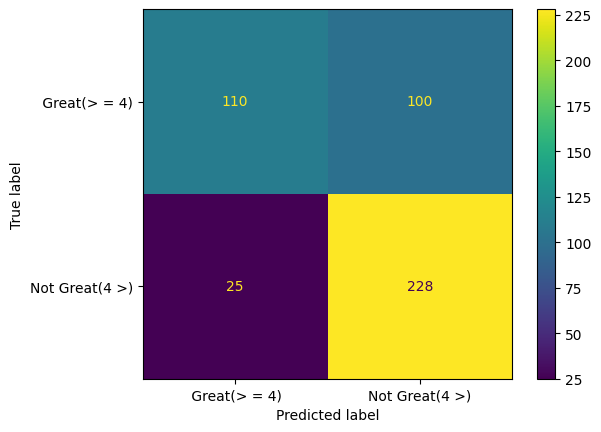

In [10]:
Xg = df[['Theme Encoded', 'Theme_Group Encoded', 'Category Encoded', 'Packaging Encoded', 'Owned', 'Pieces', 'Minifigures', 'USD_MSRP', 'Current_Price']] # Storing the predictors
evaluation_G = modelNBgenerate(Xg, y, 0.2, GaussianNB()) # Model Evaluation for Guassian Naive Bayes

This model demonstrates a decent amount of false negatives ("Great" considering to be the positive) which shows the Recall score of "Great" is low around 52%.

### **Multinomial Naive Bayes**

                precision    recall  f1-score   support

  Great(> = 4)       0.57      0.55      0.56       210
Not Great(4 >)       0.64      0.66      0.65       253

      accuracy                           0.61       463
     macro avg       0.61      0.61      0.61       463
  weighted avg       0.61      0.61      0.61       463



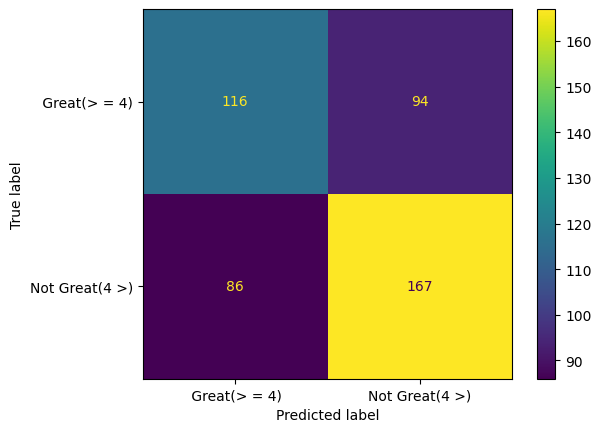

In [11]:
Xm = df[['Theme Encoded', 'Theme_Group Encoded', 'Category Encoded', 'Packaging Encoded', 'Owned Encoded', 'Pieces Encoded', 'Minifigures Encoded', 'MSRP Encoded', 'Current Price Encoded']] # Storing the predictors
evaluation_M = modelNBgenerate(Xm, y, 0.2, MultinomialNB()) # Model Evaluation for Multinomial Naive Bayes

This model demonstrates a decent amount of false negatives and false positives (whether it be "Great" or "Not Great" considering to be the positive) which shows the Recall and Precision scores to be low for both classes.

### **Complement Naive Bayes**

                precision    recall  f1-score   support

  Great(> = 4)       0.59      0.65      0.62       210
Not Great(4 >)       0.68      0.62      0.65       253

      accuracy                           0.63       463
     macro avg       0.63      0.63      0.63       463
  weighted avg       0.64      0.63      0.63       463



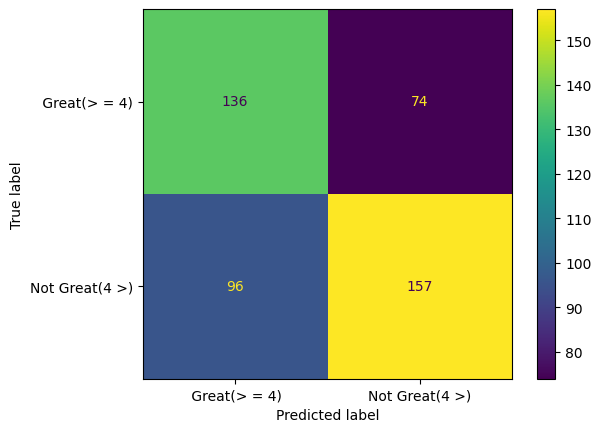

In [12]:
Xcom = df[['Theme Encoded', 'Theme_Group Encoded', 'Category Encoded', 'Packaging Encoded', 'Owned Encoded', 'Pieces Encoded', 'Minifigures Encoded', 'MSRP Encoded', 'Current Price Encoded']] # Storing the predictors
evaluation_COM = modelNBgenerate(Xm, y, 0.2,ComplementNB()) # Model Evaluation for Complement Naive Bayes

This model demonstrates a decent amount of false negatives and false positives (whether it be "Great" or "Not Great" considering to be the positive) which shows the Recall and Precision scores to be low for both classes.

### **Categorical Naive Bayes**

                precision    recall  f1-score   support

  Great(> = 4)       0.74      0.64      0.69       210
Not Great(4 >)       0.73      0.82      0.77       253

      accuracy                           0.74       463
     macro avg       0.74      0.73      0.73       463
  weighted avg       0.74      0.74      0.73       463



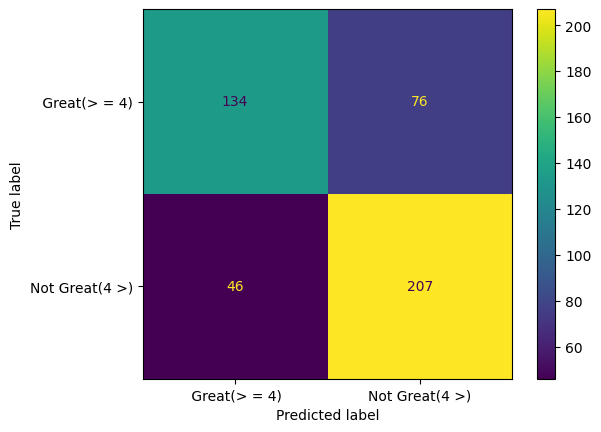

In [13]:
Xcat = df[['Theme Encoded', 'Theme_Group Encoded', 'Category Encoded', 'Packaging Encoded', 'Owned Encoded', 'Pieces Encoded', 'Minifigures Encoded', 'MSRP Encoded', 'Current Price Encoded']]  # Storing the predictors
evaluation_CAT = modelNBgenerate(Xcat, y, 0.2, CategoricalNB()) # Model Evaluation for Categorical Naive Bayes

This model demonstrates less amounts of false positives/negatives (whether it be "Great" or "Not Great" considering to be the positive) compared to the other models which shows the Recall and Precision scores to be decent for both classes.

### **Summary Between Naive Bayes Methods**

In summary, it seems none of the models reached our “Good Model” (85% or higher) criteria for any metric. However, based on the models, it seems that Gaussian and Categorical Naïve Bayes performed relatively similar and better than the Multinomial and Complement Naïve Bayes method. However, due to us looking at the macro averages, remember that the Recall for "Great" in the Gaussian NB was pretty low, so either we would need to tune it better or drop the model entirely.

In [14]:
## Displaying a summary of Models with Test Size = 20%
Summary20 = sumtable(0.2)

,Model,Precision %,Recall %,Accuracy %,Test Size %
,Gaussian NB,75.50,71.25,73.00,20
,Multinomial NB,60.71,60.62,61.12,20
,Complement NB,63.29,63.41,63.28,20
,Categorical NB,73.79,72.81,73.65,20


An explanation of why the Complement Naïve Bayes method performed poorly is because Complement Naïve Bayes is good with imbalanced datasets which the frequency of one target class is significantly more prevalent in the data than another [2].  However, our dataset is not very imbalanced as we can see below with the ratings. Our Dataset overall is relatively balanced.

In [15]:
print(df['Rating Check'].value_counts())

Rating Check
Not Great(4 >)    1234
 Great(> = 4)     1080
Name: count, dtype: Int64


### **Summary Testing Different Test Sizes Between 20% to 50%**

A parameter in the models called out in the proposal was to adjust the test size. Essentially it is how much of the data set will be used to test your model against the training data that was inputted. 100% of Data = % of Data used for Testing + % of Data used for Training. There is no ideal testing size, but typically it ranges from %20-50% [4]. Below are tables and bar plots demonstrating the performance with the change in testing size. Overall, changing this parameter does not seem to make our Naïve Bayes methods perform any better or worse. Also this parameter adjustment does not really affect our original observation of the Gaussian and Categorical methods perform better than the Multinomial and Complement methods.

#### Tabular Summary of Test Size Change

In [16]:
nb20 = sumtable(0.2) # 20% Testing Size
nb30 = sumtable(0.3) # 20% Testing Size
nb40 = sumtable(0.4) # 20% Testing Size
nb50 = sumtable(0.5) # 20% Testing Size

,Model,Precision %,Recall %,Accuracy %,Test Size %
,Gaussian NB,75.50,71.25,73.00,20
,Multinomial NB,60.71,60.62,61.12,20
,Complement NB,63.29,63.41,63.28,20
,Categorical NB,73.79,72.81,73.65,20


,Model,Precision %,Recall %,Accuracy %,Test Size %
,Gaussian NB,75.17,70.38,71.94,30
,Multinomial NB,59.16,59.14,59.42,30
,Complement NB,59.67,59.69,59.42,30
,Categorical NB,74.97,73.18,74.10,30


,Model,Precision %,Recall %,Accuracy %,Test Size %
,Gaussian NB,75.50,69.85,71.49,40
,Multinomial NB,62.31,62.28,62.53,40
,Complement NB,63.24,63.26,62.96,40
,Categorical NB,74.37,72.36,73.33,40


,Model,Precision %,Recall %,Accuracy %,Test Size %
,Gaussian NB,76.09,70.05,71.65,50
,Multinomial NB,62.32,62.34,62.49,50
,Complement NB,62.39,62.45,62.32,50
,Categorical NB,73.60,72.28,73.03,50


#### Bar Graph Summary of Test Size Change

In [17]:
# Converting the original Decimal objects as numerical and combining data
nb20[['Precision %', 'Recall %', 'Accuracy %']] = nb20[['Precision %', 'Recall %', 'Accuracy %']].apply(pd.to_numeric)
nb30[['Precision %', 'Recall %', 'Accuracy %']] = nb30[['Precision %', 'Recall %', 'Accuracy %']].apply(pd.to_numeric)
nb40[['Precision %', 'Recall %', 'Accuracy %']] = nb40[['Precision %', 'Recall %', 'Accuracy %']].apply(pd.to_numeric)
nb50[['Precision %', 'Recall %', 'Accuracy %']] = nb50[['Precision %', 'Recall %', 'Accuracy %']].apply(pd.to_numeric)
dfbar = pd.concat([nb20, nb30, nb40, nb50])

Text(0.5, 1.0, 'Gaussian NB')

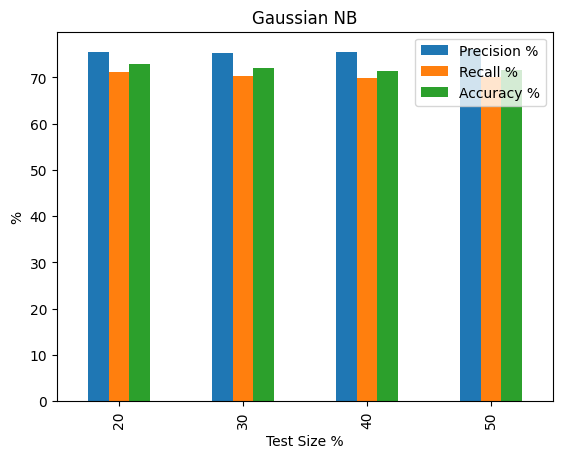

In [18]:
# Creating the Bar Graph of Test Size Changes in Gaussian NB
gnb = dfbar.loc[dfbar['Model'] == 'Gaussian NB'].plot.bar(x = 'Test Size %')
gnb.set_ylabel('%')
gnb.set_title('Gaussian NB')

Text(0.5, 1.0, 'Multinomial NB')

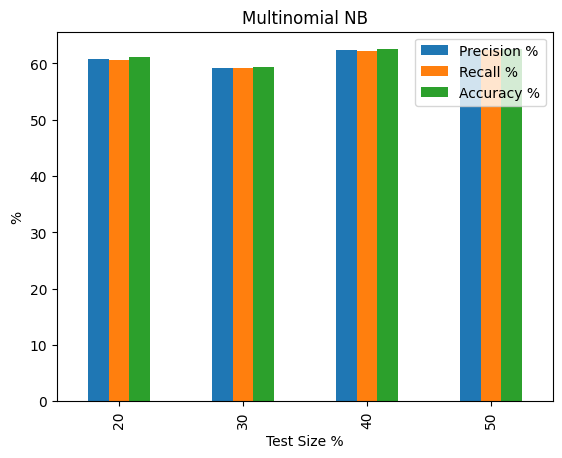

In [19]:
# Creating the Bar Graph of Test Size Changes in Multinomial NB
mnb = dfbar.loc[dfbar['Model'] == 'Multinomial NB'].plot.bar(x = 'Test Size %')
mnb.set_ylabel('%')
mnb.set_title('Multinomial NB')

Text(0.5, 1.0, 'Complement NB')

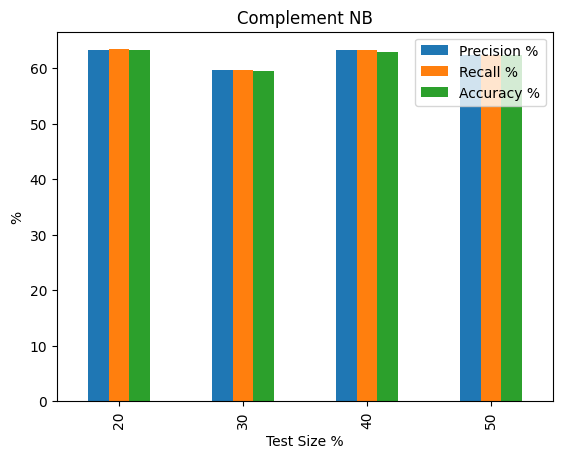

In [20]:
# Creating the Bar Graph of Test Size Changes in Complement NB
comnb = dfbar.loc[dfbar['Model'] == 'Complement NB'].plot.bar(x = 'Test Size %')
comnb.set_ylabel('%')
comnb.set_title('Complement NB')

Text(0.5, 1.0, 'Categorical NB')

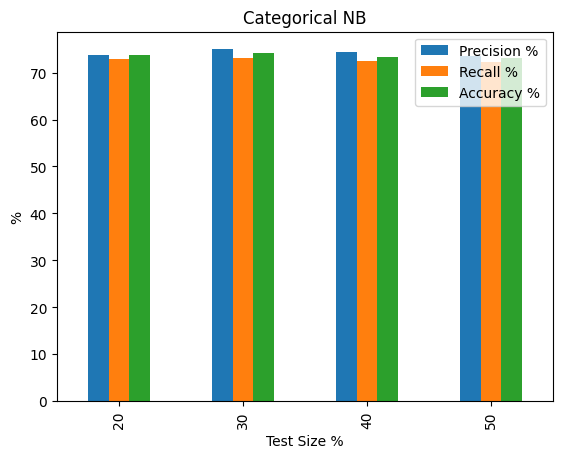

In [21]:
# Creating the Bar Graph of Test Size Changes in Categorical NB
catnb = dfbar.loc[dfbar['Model'] == 'Categorical NB'].plot.bar(x = 'Test Size %')
catnb.set_ylabel('%')
catnb.set_title('Categorical NB')

## **K-Nearest Neighbor Model Implementation and Results** 

Another supervised machine learning classification algorithm commonly used is K-Nearest Neighbors (K-NN) which is non-parametric that uses proximity of points to make predictions [5]. K-NN does not really need any training and does not need you to know anything about the underlying probability distributions of the data [6]. Below we have implemented a basic K-NN model with a test size of 0.20 with n_neighbors to 5 (this parameter can be tuned if needed) [6]. 

                precision    recall  f1-score   support

  Great(> = 4)       0.71      0.73      0.72       210
Not Great(4 >)       0.77      0.75      0.76       253

      accuracy                           0.74       463
     macro avg       0.74      0.74      0.74       463
  weighted avg       0.74      0.74      0.74       463



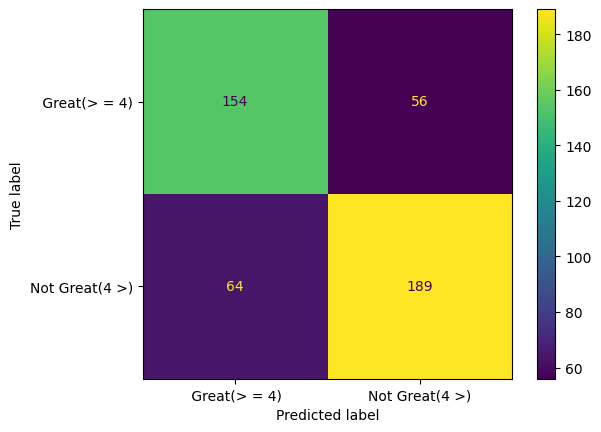

In [22]:
Xk = df[['Theme Encoded', 'Theme_Group Encoded', 'Category Encoded', 'Packaging Encoded', 'Owned', 'Pieces', 'Minifigures', 'USD_MSRP', 'Current_Price']] # Stores features

#n_neighbors = 5
evaluation_K = modelKNNgenerate(Xk, y, 0.2, KNeighborsClassifier(n_neighbors=5))

## **Classification Algorithm Comparisons** 

The summary table below combines the Naïve Bayes method and K-NN method aggregate report data. We can see that K-NN method performs relatively well if not slightly better than the Gaussian and Categorical Naïve Bayes methods.

In [23]:
## Test Size = 20% with KNN
Summary_DataK = {'Model': ['Gaussian NB', 'Multinomial NB', 'Complement NB', 'Categorical NB', 'K-NN'],
     'Precision %': [
         round(Decimal(evaluation_G[0]*100), 2), 
         round(Decimal(evaluation_M[0]*100), 2), 
         round(Decimal(evaluation_COM[0]*100), 2), 
         round(Decimal(evaluation_CAT[0]*100), 2),
         round(Decimal(evaluation_K[0]*100), 2)
         ], 
     'Recall %': [
         round(Decimal(evaluation_G[1]*100), 2), 
         round(Decimal(evaluation_M[1]*100), 2), 
         round(Decimal(evaluation_COM[1]*100), 2), 
         round(Decimal(evaluation_CAT[1]*100), 2),
         round(Decimal(evaluation_K[1]*100), 2)
         ],
     'Accuracy %': [
         round(Decimal(evaluation_G[2]*100), 2), 
         round(Decimal(evaluation_M[2]*100), 2), 
         round(Decimal(evaluation_COM[2]*100), 2), 
         round(Decimal(evaluation_CAT[2]*100), 2),
         round(Decimal(evaluation_K[0]*100), 2)
         ],
        }
Summary_TableK = pd.DataFrame(data=Summary_DataK)
blankIndex=[''] * len(Summary_TableK)
Summary_TableK.index=blankIndex
display(Summary_TableK)

,Model,Precision %,Recall %,Accuracy %
,Gaussian NB,75.50,71.25,73.00
,Multinomial NB,60.71,60.62,61.12
,Complement NB,63.29,63.41,63.28
,Categorical NB,73.79,72.81,73.65
,K-NN,73.89,74.02,73.89


## **Algorithm Predictions** 

What type of rating will we get if make a new action Star Wars AT-TE set with normal packaging, 1082 pieces, with 9 minifigures at $140? 
<br>
We have sold about 40000 similar sets at a price point of $90.
<br>
<br>
Code Translations Needed (if you would like to try yourself, you can go the appendix that has these encode translations):
<br>
<br>
Theme Encoded for 'Star Wars' = 57
<br>
Theme Group Encoded for 'Action/Adventure' = 0
<br>
Category Encoded for 'Normal' = 1
<br>
Packaging Encoded for 'Box' = 1
<br>
Owned Encoded for '# Owned > 15000' = 1
<br>
Pieces Encoded for '# of Pieces > 1000' = 1
<br>
Minifigures Encoded for '# of Minifigures <= 10' = 0
<br>
MSRP Encoded for 'MSRP <= $100' = 1
<br>
Current Encoded for '100 < Current Price <= $500' = 0

In [24]:
# All models will need the encoded Theme
te = 57

# All models will need the encoded Theme Group
tge = 0

# All models will need the encoded Category
ce = 1

# All models will need the encoded Packaging
pe = 1

# Gaussian NB and KNN will need the actual Number Owned value, while the otheres need the encoded Number Owned value
oe = 1
og = 40000

# Gaussian NB and KNN will need the actual Number of Pieces value, while the others need the encoded Number of Pieces value
pie = 1
pieg = 1082

# Gaussian NB and KNN will need the actual Number of Minifigures value, while the others need the encoded Number of Minifigures value
me = 0
mg = 9

# Gaussian NB and KNN will need the actual MSRP value, while the others need the encoded MSRP value
mse = 1
msg = 90

# Gaussian NB and KNN will need the actual current value (estimator), while the others need the encoded Current Price value
cpe = 0
cpg = 140

feature_evalsNB = [te, tge, ce, pe, oe, pie, me, mse, cpe]
feature_evalsGK = [te, tge, ce, pe, og, pieg, mg, msg, cpg]
predictg = predictNB(Xg, y, 0.2, GaussianNB(), feature_evalsGK)
predictm = predictNB(Xm, y, 0.2, MultinomialNB(), feature_evalsNB)
predictcom = predictNB(Xcom, y, 0.2, ComplementNB(), feature_evalsNB)
predictcat = predictNB(Xcat, y, 0.2, CategoricalNB(), feature_evalsNB)
predictK = predictKNN(Xk, y, 0.2, KNeighborsClassifier(n_neighbors=5), feature_evalsGK)


c:\Users\acai1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\acai1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\acai1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(
c:\Users\acai1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


### **Algorithm Summaries With Predictions** 

With the characteristics of this new Star Wars Lego, it seems that this would overall be well received by our models below!

In [25]:
## Test Size = 20% with KNN
Summary_DataK = {
     'Model': [
         'Gaussian NB', 
         'Multinomial NB', 
         'Complement NB', 
         'Categorical NB', 
         'K-NN'
         ],
     'Precision %': [
         round(Decimal(evaluation_G[0]*100), 2), 
         round(Decimal(evaluation_M[0]*100), 2), 
         round(Decimal(evaluation_COM[0]*100), 2), 
         round(Decimal(evaluation_CAT[0]*100), 2),
         round(Decimal(evaluation_K[0]*100), 2)
         ], 
     'Recall %': [
         round(Decimal(evaluation_G[1]*100), 2), 
         round(Decimal(evaluation_M[1]*100), 2), 
         round(Decimal(evaluation_COM[1]*100), 2), 
         round(Decimal(evaluation_CAT[1]*100), 2),
         round(Decimal(evaluation_K[1]*100), 2)
         ],
     'Accuracy %': [
         round(Decimal(evaluation_G[2]*100), 2), 
         round(Decimal(evaluation_M[2]*100), 2), 
         round(Decimal(evaluation_COM[2]*100), 2), 
         round(Decimal(evaluation_CAT[2]*100), 2),
         round(Decimal(evaluation_K[0]*100), 2)
         ],
     'Prediction': [
         predictg, 
         predictm, 
         predictcom, 
         predictcat,
         predictK
         ],         
        }
Summary_TableK = pd.DataFrame(data=Summary_DataK)
blankIndex=[''] * len(Summary_TableK)
Summary_TableK.index=blankIndex
display(Summary_TableK)

,Model,Precision %,Recall %,Accuracy %,Prediction
,Gaussian NB,75.50,71.25,73.00,Great(> = 4)
,Multinomial NB,60.71,60.62,61.12,Great(> = 4)
,Complement NB,63.29,63.41,63.28,Great(> = 4)
,Categorical NB,73.79,72.81,73.65,Great(> = 4)
,K-NN,73.89,74.02,73.89,Great(> = 4)


Based on the summary data, Multinomial and Complement NB methods scored pretty low across the board of metrics. These models are not very accurate to predicting the dataset and the inaccurate outputs have a decent likelihood to be false positives (low Precision) or false negatives (low Recall). Gaussian NB, Categorical NB, and K-NN performed the best of the worst.

## **Conclusion**

Based on the analysis of the Naïve Bayes methods explored in this project, none of them would be considered a “Good Model” to predict whether a Lego Set will receive a “Great” rating since they all scored below 85% across Precision, Recall, and Accuracy. The K-Nearest Neighbor did not do well enough either even though it seemed slightly better. Furthermore, none of the models had metrics even at 80%.
<br>
<br>
Some of the weaknesses and limitations of my project is firstly, my models are as good as the dataset. Before cleaning there was 14,000+ data points, but after cleaning and extracting the necessary data, we only ended up with slightly over 2300 data points. Most of the dataset was not helpful. Furthermore, the author of this data has mentioned that there is an underreporting of sales values as well as this data came from a third-party reseller which is not representative of how much the Lego company itself sold. Another weakness of the project is that is that Naïve Bayes suffers from the zero probability problem where when a particular attribute’s conditional probability equals zero, Naïve Bayes will completely fail to produce a valid prediction [6]. Finally, another limitation is the granularity and encoding done on the dataset. The labels I was creating were estimates and could be hiding a lot of details which throws of my models since my ranges were so arbitrary. 
<br>
<br>
A way to move forward is to possibly explore another dataset that has more reliable data with more features filled out and specifically see if we can tune the Gaussian or Categorical Naïve Bayes methods. Not only are the features present, but also that there is siginficantly more "valid" data points (i.e. the number of data points after cleaning/processing does not drop by over 80%). In my opinion if we were to stick with Naïve Bayes, we should specifically look at tuning the Categorical method because most of the data seems to be category-like. This project also looked at a simple K-Nearest Neighbor model, but there were other K-NN methods that could perform better. Furthermore, as discussed in the introduction, there are other well-known classification algorithms such as Logistic Regression, Decision Tree, and Support Vector Machines that could model Lego set features even better.
<br>
<br>
From this project I learned to understand Bayes Theorem a lot better and why it is such a widely used concept in supervised machine learning. I started to appreciate the concept of conditional probability as well. I also learned what classification algorithms are and how these concepts apply to supervised machine learning. I am also happy that I had the opportunity to create my first machine learning model and got a basic understanding of the topic. I feel more competent in my ability to create these models. This report will be of value to me as I am interested in taking courses in supervised/unsupervised machine learning, reinforcement learning, and natural language processing. Overall, my goal is to find a career as potentially a AI/ML engineer and this project is a good introduction of the world I will enter. Even though my project did not hit my sucess criteria, I was able to still create models and troubleshoot (such as finding out you cannot put text data into the NB models without encoding it) it to produces analytical results which I am proud of.

## **Bibliography**

[1] Spearman’s Rank-Order Correlation - a Guide to When to Use It, What It Does and What the Assumptions Are. statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php#:~:text=A%20monotonic%20relationship%20is%20a,the%20other%20variable%20value%20decreases.
<br>
<br>
[2] Scikit-learn, scikit-learn.org/stable/modules/naive_bayes.html.
<br>
<br>
[3] Shung, Koo Ping. “Accuracy, Precision, Recall or F1? - Towards Data Science.” Medium, 10 Apr. 2020, towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.
<br>
<br>
[4] Python, Real. Split Your Dataset With Scikit-learn’s Train_Test_Split(). 21 Oct. 2023, realpython.com/train-test-split-python-data.
<br>
<br>
[5] What Is the K-nearest Neighbors Algorithm? | IBM. www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.
<br>
<br>
[6] Glen, Stephanie. “Comparing Classifiers: Decision Trees, K-NN &Amp; Naive Bayes.” Data Science Central, 19 June 2019, www.datasciencecentral.com/comparing-classifiers-decision-trees-knn-naive-bayes/#:~:text=Naive%20Bayes%20is%20a%20linear,Naive%20Bayes%20over%20K%2DNN.

## **Appendix**

### **Encoded Mapping Translations**

In [26]:
EncodedList = [
               ['Theme', 'Theme Encoded'], 
               ['Theme_Group', 'Theme_Group Encoded'],
               ['Category', 'Category Encoded'], 
               ['Packaging', 'Packaging Encoded'],
               ['Owned Label', 'Owned Encoded'],
               ['Pieces Label', 'Pieces Encoded'],
               ['Minifigures Label', 'Minifigures Encoded'],
               ['MSRP Label', 'MSRP Encoded'],
               ['Current Price Label', 'Current Price Encoded']
               ]

def labelTranslation(nonlabel, encoded, odf):
    dataframe = odf[[nonlabel, encoded]]
    dataframetranslate = dataframe.drop_duplicates()
    blankIndex=[''] * len(dataframetranslate)
    dataframetranslate.index=blankIndex
    with pd.option_context('display.max_rows', None,):
        display(dataframetranslate.sort_values(encoded))

for i in EncodedList:
    labelTranslation(i[0], i[1], df)

,Theme,Theme Encoded
,Advanced models,0
,Agents,1
,Aqua Raiders,2
,Atlantis,3
,Avatar,4
,Batman,5
,Bionicle,6
,Bricks and More,7
,Cars,8
,Castle,9


,Theme_Group,Theme_Group Encoded
,Action/Adventure,0
,Basic,1
,Constraction,2
,Historical,3
,Junior,4
,Licensed,5
,Miscellaneous,6
,Model making,7
,Modern day,8
,Pre-school,9


,Category,Category Encoded
,Extended,0
,Normal,1


,Packaging,Packaging Encoded
,Blister pack,0
,Box,1
,Box with backing card,2
,Foil pack,3
,Other,4
,Plastic box,5
,Polybag,6
,Tub,7
,{Not specified},8


,Owned Label,Owned Encoded
,# Owned <= 1000,0
,# Owned > 15000,1
,1000 < # Owned <= 5000,2
,5000 < # Owned <= 10000,3


,Pieces Label,Pieces Encoded
,# of Pieces <= 100,0
,# of Pieces > 1000,1
,100 < # of Pieces <= 500,2
,500 < # of Pieces <= 1000,3


,Minifigures Label,Minifigures Encoded
,# of Minifigures <= 10,0
,# of Minifigures > 10,1


,MSRP Label,MSRP Encoded
,$100 < MSRP <= $300,0
,MSRP <= $100,1
,MSRP > $300,2


,Current Price Label,Current Price Encoded
,100 < Current Price <= $500,0
,Current Price <= $100,1
,Current Price > $500,2
